In [1]:
import pandas as pd
import numpy as np
import sys
import re
print(sys.version)

3.9.16 (main, Dec  7 2022, 01:12:08) 
[GCC 11.3.0]


In [2]:
'''
CYU : Check your understanding
ANS : The participant's answer to the question
COR : 1 for correct 0 for incorrrect
CON : The participant's conceptual hint
OP :  The participant's grounded operational hint

ALL_VALS: The grounded operational hint includes all argument and constant values. (e.g. "Add 3 and 4". Not "Add the numerators")
ALL_OPS: All steps are stated as explicit executable mathematical operations. And the stated operations are functionally correct. (e.g. "To find x divide 9 from 18",
          as opposed to "Solve for x".) 
'''
df = pd.read_csv("NLP_how_turk_data_cleaned.csv",delimiter=',')
print(df.columns)

Index(['Timestamp', 'Total score', 'What is your Prolific or MTurk ID?',
       'Platform', 'CYU 1', 'CYU 2', 'CYU 3', 'CYU 4', 'CYU 5', 'CYU Total',
       'ANS_1', 'COR_1', 'CON_1', 'OP_1', 'ALL_VALS_1', 'ALL_OPS_1', 'ANS_2',
       'COR_2', 'CON_2', 'OP_2', 'ALL_VALS_2', 'ALL_OPS_2', 'ANS_3', 'COR_3',
       'CON_3', 'OP_3', 'ALL_VALS_3', 'ALL_OPS_3', 'ANS_4', 'COR_4', 'CON_4',
       'OP_4', 'ALL_VALS_4', 'ALL_OPS_4', 'ANS_5', 'COR_5', 'CON_5', 'OP_5',
       'ALL_VALS_5', 'ALL_OPS_5', 'ANS_6', 'COR_6', 'CON_6', 'OP_6',
       'ALL_VALS_6', 'ALL_OPS_6', 'ANS_7', 'COR_7', 'CON_7', 'OP_7',
       'ALL_VALS_7', 'ALL_OPS_7', 'ANS_8', 'COR_8', 'CON_8', 'OP_8',
       'ALL_VALS_8', 'ALL_OPS_8', 'ANS_9', 'COR_9', 'CON_9', 'OP_9',
       'ALL_VALS_9', 'ALL_OPS_9', 'ANS_10', 'COR_10', 'CON_10', 'OP_10',
       'ALL_VALS_10', 'ALL_OPS_10', 'ANS_11', 'COR_11', 'CON_11', 'OP_11',
       'ALL_VALS_11', 'ALL_OPS_11', 'ANS_12', 'COR_12', 'CON_12', 'OP_12',
       'ALL_VALS_12', 'ALL_OPS_12', 'ANS

In [3]:
from apprentice.agents.cre_agents.how.nlp.examples import do_search as _do_search, func_dictionary
do_search = lambda *args : _do_search(*args, all_levels=True)

CRE Cache Lives Here:  /home/danny/.cache/cre/cre_cache


/home/danny/Projects/Cognitive-Rule-Engine/cre/core.py:121: RuntimeWarning: CRE cache's type registry is non-contiguous. This may indicate a filesystem race condition in a previous CRE session. This can cause mistyping errors which can produce segmentation faults.
  warnings.warn("CRE cache's type registry is non-contiguous. This may indicate a filesystem race condition in a previous CRE session. This can cause mistyping errors which can produce segmentation faults.", RuntimeWarning)
/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


<class 'cre.var.VarTypeClass'> None None


/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


THIS HAS BEEN CALLED
unicode_type
unicode_type


/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [4]:
N_PROBS = 14

corr_strs1 = ["(Divide(Multiply(a, b), c), [100.0, 3.0, 12.0])",
              "(Multiply(Divide(a, b), c), [100.0, 12.0, 3.0])",
              "(Multiply(Divide(a, b), c), [3.0, 12.0, 100.0])",
              "(Divide(a, Divide(b, c)), [100.0, 12.0, 3.0])",
              "(Divide(a, Divide(b, c)), [3.0, 12.0, 100.0])",
              ]
def do_problem1(hint):
    p = do_search([3,12,100], 25, hint)
    p.add_corr_strs(corr_strs1)
    return p

corr_strs2 = ["(Multiply(a, b), [2.0, 3.0])",
              "(Multiply(a, b), [3.0, 2.0])"]    
def do_problem2(hint):
    p = do_search([3,4,2,5], 6, hint)
    p.add_corr_strs(corr_strs2)
    return p

corr_strs3 = ["(Add(Multiply(a, b), Multiply(c, d)), [3.0, 5.0, 4.0, 2.0])",
              "(Add(Multiply(a, b), Multiply(c, d)), [3.0, 5.0, 2.0, 4.0])",
              "(Add(Multiply(a, b), Multiply(c, d)), [5.0, 3.0, 4.0, 2.0])",
              "(Add(Multiply(a, b), Multiply(c, d)), [5.0, 3.0, 2.0, 4.0])",
              "(Add(Multiply(a, b), Multiply(c, d)), [2.0, 4.0, 5.0, 3.0])",
              "(Add(Multiply(a, b), Multiply(c, d)), [2.0, 4.0, 3.0, 5.0])",
              "(Add(Multiply(a, b), Multiply(c, d)), [4.0, 2.0, 3.0, 5.0])",
              "(Add(Multiply(a, b), Multiply(c, d)), [4.0, 2.0, 5.0, 3.0])",
              ]
def do_problem3(hint):
    p = do_search([3,4,2,5], 23, hint)
    p.add_corr_strs(corr_strs3)
    return p

corr_strs4 = ["(Multiply(a, b), [4.0, 5.0])",
              "(Multiply(a, b), [5.0, 4.0])"]
def do_problem4(hint):
    p = do_search([3,4,2,5], 20, hint)
    p.add_corr_strs(corr_strs4)
    return p 

corr_strs5 = ['(Multiply(a, b), [3.0, 4.0])',
              '(Multiply(a, b), [4.0, 3.0])']
def do_problem5(hint):
    p = do_search([3,4,2,3], 12, hint)
    p.add_corr_strs(corr_strs5)
    return p

corr_strs6 = ['(Multiply(a, a), [3.0])',
              '(Multiply(a, b), [3.0, 3.0])']
def do_problem6(hint):
    p = do_search([3,4,2,3,12], 9, hint)
    p.add_corr_strs(corr_strs6)
    return p

corr_strs7 = ['(Add(a, b), [9.0, 8.0])',
              '(Add(a, b), [8.0, 9.0])']
def do_problem7(hint):
    p = do_search([3,4,2,3,12,9,8], 17, hint)
    p.add_corr_strs(corr_strs7)
    return p

corr_strs8 = ['(Subtract(Half(Multiply(a, b)), Half(Multiply(c, d))), [20.0, 12.0, 10.0, 6.0])',
              '(Subtract(Half(Multiply(a, b)), Half(Multiply(c, d))), [20.0, 12.0, 6.0, 10.0])',
              '(Subtract(Half(Multiply(a, b)), Half(Multiply(c, d))), [12.0, 20.0, 10.0, 6.0])',
              '(Subtract(Half(Multiply(a, b)), Half(Multiply(c, d))), [12.0, 20.0, 6.0, 10.0])']
def do_problem8(hint):
    p = do_search([20,12,10,6], 90, hint)
    p.add_corr_strs(corr_strs8)
    return p

corr_strs9 = ['(Multiply(Divide(a, b), Square(c)), [135.0, 360.0, 6.0])',
              '(Multiply(Square(a), Divide(b, c)), [6.0, 135.0, 360.0])',
              '(Multiply(Multiply(a, a), Divide(b, c)), [6.0, 135.0, 360.0])',
              '(Multiply(Divide(a, b), Multiply(c, c)), [135.0, 360.0, 6.0])',
              ]
def do_problem9(hint):
    p = do_search([135,6,360], 13.5, hint)
    p.add_corr_strs(corr_strs9)
    return p

corr_strs10 = ['(Multiply(Divide(a, b), c), [12.0, 3.0, 2.0])', 
               '(Multiply(Divide(a, b), c), [2.0, 3.0, 12.0])',
               '(Divide(Multiply(a, b), c), [12.0, 2.0, 3.0])',
               '(Divide(Multiply(a, b), c), [2.0, 12.0, 3.0])', 
               '(Divide(a, Divide(b, c)), [12.0, 3.0, 2.0])',
               '(Divide(a, Divide(b, c)), [2.0, 3.0, 12.0])'
              ]
def do_problem10(hint):
    p = do_search([2,12,3], 8, hint)
    p.add_corr_strs(corr_strs10)
    return p

corr_strs11 = ['(Divide(a, Add(b, c)), [144.0, 0.2, 1.0])',
               '(Divide(a, b), [144.0, 1.2])']
def do_problem11(hint):
    p = do_search([20,144,1.2,1,.2], 120, hint)
    p.add_corr_strs(corr_strs11)
    return p

corr_strs12 = ['(Add(Divide(a, b), c), [10.0, 2.0, 3.0])']
def do_problem12(hint):
    p =  do_search([3,10,2], 8, hint)
    p.add_corr_strs(corr_strs12)
    return p
    
corr_strs13 = ['(Ones(Add(a, b)), [8.0, 4.0])',
               '(Ones(Add(a, b)), [4.0, 8.0])']
def do_problem13(hint):
    p = do_search([3,8,2,4,7], 2, hint)
    p.add_corr_strs(corr_strs13)
    return p

corr_strs14 = ['(Divide(Subtract(a, b), Subtract(c, d)), [4.0, 8.0, 5.0, 7.0])',
               '(Divide(Subtract(a, b), Subtract(c, d)), [8.0, 4.0, 7.0, 5.0])']
def do_problem14(hint):
    p = do_search([5,4,7,8], 2, hint)
    p.add_corr_strs(corr_strs14)
    return p
    

In [5]:
# Make a data frame for the parsing statistics
from itertools import chain
columns = list(chain(*[[
    f"ALL_VALS_{i}",
    f"ALL_OPS_{i}",

    f"HAS_COR_{i}",
    f"N_INCOR_{i}",
    f"N_INFS_{i}",
    
    f"P4_HAS_COR_{i}",
    f"P4_N_INCOR_{i}",
    f"P4_N_INFS_{i}",
    
    ] for i in range(1,N_PROBS+1)]))
parse_stats_df = pd.DataFrame(columns=columns,index=range(10))
for i in range(1,N_PROBS+1):
    parse_stats_df[f"ALL_VALS_{i}"] = df[f"ALL_VALS_{i}"]
    parse_stats_df[f"ALL_OPS_{i}"] = df[f"ALL_OPS_{i}"]

#Grab just the grounded operational hints
op_hints_df = df.filter(regex="OP_\d")
    
total_n_correct = 0
total_n = 0
n_incorrects = []
for name, col in list(op_hints_df.items()):#[5:6]:
    prob_num = re.findall(r'\d+',name)[0]
    #if(int(prob_num) != 14): continue
        
    do_problem = locals()[f'do_problem{prob_num}']
    #print(f'\n{name}:')
    print(f'** {prob_num} **')
    prob_n_correct = 0
    num_col = 0
    for i, op_hint in enumerate(col):
        # Don't bother if they got the problem wrong 
        if(not df[f'COR_{prob_num}'][i]):
            continue 
        p = do_problem(op_hint)
        
        print(p.summary(all_phases=True), "(G)" if parse_stats_df.at[i,f"ALL_OPS_{prob_num}"] and parse_stats_df.at[i,f"ALL_VALS_{prob_num}"] else "")
        print(p.policy)
        #print(p.data[4].keys())
        parse_stats_df.at[i,f"HAS_COR_{prob_num}"] = p.has_correct
        parse_stats_df.at[i,f"N_INCOR_{prob_num}"] = p.num_incorrect
        parse_stats_df.at[i,f"N_INFS_{prob_num}"] = p.num_forward_inferences
        parse_stats_df.at[i,f"P4_HAS_COR_{prob_num}"] = p.data[5]['has_correct']
        parse_stats_df.at[i,f"P4_N_INCOR_{prob_num}"] = p.data[5]['num_incorrect']
        parse_stats_df.at[i,f"P4_N_INFS_{prob_num}"] = p.data[5]['num_fwd_infs']
        if(p.has_correct):
            total_n_correct += 1
            prob_n_correct += 1
            n_incorrects.append(p.num_incorrect)
        if(not p.is_null):
            for expl in p.unq_expls:
                print(expl)
        #print("--phase 4--")
        #for expl in p.get_unq_expls(phase=4):
        #    print(expl)
        num_col += 1
        print()
        
    #print("<<", num_col)
    total_n += num_col
    #print("Problem Has Correct:", prob_n_correct / num_col)    
    #print()
#print("Total Has Correct:", total_n_correct / total_n)
#print("Average Incorrect:", np.average(n_incorrects))
        



** 1 **


/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


1.5 a / (b / c) [100.0, 12.0, 3.0]


/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 26
2 (a+1) + a [12.0] 25.0
2 ((a/2)/2) [100.0] 25.0
2 (a * b) / c [100.0, 3.0, 12.0] 25.0
2 a / (b / c) [100.0, 12.0, 3.0] 25.0
2 a / (b+1) [100.0, 3.0] 25.0
2 a / (b / c) [3.0, 12.0, 100.0] 25.0
2 (a / b) * c [100.0, 12.0, 3.0] 25.0
2 (a / b) * c [3.0, 12.0, 100.0] 25.0
2 (a + a)+1 [12.0] 25.0
2 (a*2)+1 [12.0] 25.0
2 (a^a) - (a-1) [3.0] 25.0
2 (a^a) - Ones(b) [3.0, 12.0] 25.0
2 (a / b) - (a / c) [100.0, 3.0, 12.0] 25.0
2 (a * b) - (a-1) [12.0, 3.0] 25.0
2 Tens(a) + (a + a) [12.0] 25.0
2 (a / a) + (b + b) [100.0, 12.0] 25.0
2 (a / a) + (a + a) [12.0] 25.0
2 (a / a) + (b + b) [3.0, 12.0] 25.0
2 Tens(a) + (a*2) [12.0] 25.0
2 (a / a) + (b*2) [100.0, 12.0] 25.0
2 (a / a) + (a*2) [12.0] 25.0
2 (a / a) + (b*2) [3.0, 12.0] 25.0
2 (a/2) / (b-1) [100.0, 3.0] 25.0
2 (a/2) / Ones(b) [100.0, 12.0] 25.0
2 Ones(a) 

2 Tens(a) + (a*2) [12.0] 25.0
2 (a / a) + (b*2) [100.0, 12.0] 25.0
2 (a / a) + (a*2) [12.0] 25.0
2 (a / a) + (b*2) [3.0, 12.0] 25.0
2 (a/2) / (b-1) [100.0, 3.0] 25.0
2 (a/2) / Ones(b) [100.0, 12.0] 25.0
2 Ones(a) / (b / c) [3.0, 12.0, 100.0] 25.0
2 (a / b) * Ones(c) [100.0, 12.0, 3.0] 25.0
-- Goal 25 : "divide 3 by 12 to get .25, then multiply by 100 which is 25 percent."
✔ (1/1) :  5, 5 unique solutions at phase 4. *
✔ (1/22) :  26, 26 unique solutions at phase 5. (G)
[[(Multiply(a, b), [100.0]), (Divide(a, b), [3.0, 12.0])]]
(Divide(Multiply(a, b), c), [100.0, 3.0, 12.0])
(Multiply(Divide(a, b), c), [3.0, 12.0, 100.0])
(Divide(a, Divide(b, c)), [100.0, 12.0, 3.0])
(Multiply(Divide(a, b), c), [100.0, 12.0, 3.0])
(Divide(a, Divide(b, c)), [3.0, 12.0, 100.0])

1.3333333333333333 (a * b) / c [3.0, 100.0, 12.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 E

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 5
1 a + b [2.0, 4.0] 6.0
1 a + a [3.0] 6.0
1 a * b [2.0, 3.0] 6.0
1 a+1 [5.0] 6.0
1 (a*2) [3.0] 6.0
-- Goal 6 : "Multiply 3 and 2 together because they are both combined with x. Write the product as the value of a."
✔ (1/1) :  2, 2 unique solutions at phase 1. *
✔ (1/1) :  2, 1 unique solutions at phase 2.
✔ (1/1) :  2, 2 unique solutions at phase 3.
✔ (1/1) :  1, 1 unique solutions at phase 4.
✔ (1/5) :  5, 5 unique solutions at phase 5. (G)
[[(Multiply(a, b), [3.0, 2.0])], [(Multiply(a, b), [])]]
(Multiply(a, b), [2.0, 3.0])
(Multiply(a, b), [3.0, 2.0])

2.0 a * b [3.0, 2.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 5
1 a + b [2.0, 4.0] 6.0
1 a + a [3.0] 6

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 62
2 (a^a) - b [3.0, 4.0] 23.0
2 (a^b) - b [5.0, 2.0] 23.0
2 (a * a) - b [5.0, 2.0] 23.0
2 (a^2) - b [5.0, 2.0] 23.0
2 (a * b) + c [5.0, 4.0, 3.0] 23.0
2 (a^b) - (b + c) [2.0, 5.0, 4.0] 23.0
2 (a^b) - (c^a) [2.0, 5.0, 3.0] 23.0
2 (a^b) - (c * c) [2.0, 5.0, 3.0] 23.0
2 (a^b) - (c^2) [2.0, 5.0, 3.0] 23.0
2 (a^a) - (b-1) [3.0, 5.0] 23.0
2 (a^a) - (b + b) [3.0, 2.0] 23.0
2 (a^a) - (b^b) [3.0, 2.0] 23.0
2 (a^a) - (b * b) [3.0, 2.0] 23.0
2 (a^a) - Ones(b) [3.0, 4.0] 23.0
2 (a^a) - (a+1) [3.0] 23.0
2 (a^a) - (b^2) [3.0, 2.0] 23.0
2 (a^a) - (b*2) [3.0, 2.0] 23.0
2 (a * b) - (c - a) [5.0, 4.0, 2.0] 23.0
2 (a^b) - (a - c) [5.0, 2.0, 3.0] 23.0
2 (a * a) - (a - b) [5.0, 3.0] 23.0
2 (a^2) - (a - b) [5.0, 3.0] 23.0
2 (a^b) - (c - b) [5.0, 2.0, 4.0] 23.0
2 (a * a) - (b - c) [5.0, 4.0, 2.0] 23.0
2 (a^2) - (b - c) [5.

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 1
1 a * b [5.0, 4.0] 20.0
-- Goal 20 : "Multiply 4 and 5 to get c"
✔ (1/1) :  1, 1 unique solutions at phase 1. *
✔ (1/1) :  1, 1 unique solutions at phase 2.
✔ (1/1) :  1, 1 unique solutions at phase 3.
✔ (1/1) :  1, 1 unique solutions at phase 4.
✔ (1/1) :  1, 1 unique solutions at phase 5. (G)
[[(Multiply(a, b), [4.0, 5.0])]]
(Multiply(a, b), [4.0, 5.0])

2.0 a * b [4.0, 5.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 1
1 a * b [5.0, 4.0] 20.0
-- Goal 20 : "c is calculated by multiplying 4 and 5, the constant terms"
✔ (1/1) :  1, 1 unique solutions at phase 1. *
✔ (1/1) :  1, 1 unique solutions at phase 2.
✔ (1/1) :  1, 1 unique solutions at phase 3.
✔ (1/

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 2
1 a * b [4.0, 3.0] 12.0
1 a * b [4.0, 3.0] 12.0
-- Goal 12 : "In order to simplify the fractions, 3/4 will be multiplied by 3 to get 9/12. 2/3 will be multiplied by 4 to get 8/12. Now that the denominator of both fractions is 12, they are ready to be simplified."
✔ (1/1) :  2, 1 unique solutions at phase 1. *
✔ (1/1) :  2, 1 unique solutions at phase 2.
✔ (1/1) :  2, 1 unique solutions at phase 3.
✔ (1/1) :  2, 1 unique solutions at phase 4.
✔ (1/1) :  2, 1 unique solutions at phase 5. (G)
[[(Divide(a, b), [2.0, 3.0]), (Divide(a, b), []), (Divide(a, b), [3.0, 4.0]), (Divide(a, b), [])], [(Multiply(a, b), [])]]
(Multiply(a, b), [4.0, 3.0])

** 6 **
2.0 a * b [3.0, 3.0]
2.0 a * b [3.0, 3.0]
2.0 a * b [3.0, 3.0]
2.0 a * b [3.0, 3.0]
1.5 a * a [3.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), 

UniTuple(class(float64) x 2)


/home/danny/Projects/Cognitive-Rule-Engine/cre/sc_planner.py:878: NumbaTypeSafetyWarning: unsafe cast from UniTuple(int64 x 2) to Tuple(uint16, int64). Precision may be lost.
  v = call_op_for_inds(planner, func, return_type, arg_types, curr_infer_depth, inds)
/home/danny/Projects/Cognitive-Rule-Engine/cre/sc_planner.py:891: NumbaTypeSafetyWarning: unsafe cast from int64 to uint16. Precision may be lost.
  planner.val_map_ptr_dict[ret_type_t_id])


2.0 a + b [9.0, 8.0]


/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 1
1 a + b [8.0, 9.0] 17.0
-- Goal 17 : "Add 9 and 8 to get the new numerator"
✔ (1/1) :  1, 1 unique solutions at phase 1. *
✔ (1/1) :  1, 1 unique solutions at phase 2.
✔ (1/1) :  1, 1 unique solutions at phase 3.
✔ (1/1) :  1, 1 unique solutions at phase 4.
✔ (1/1) :  1, 1 unique solutions at phase 5. (G)
[[(Add(a, b), [9.0, 8.0])]]
(Add(a, b), [9.0, 8.0])

0.16666666666666666 a + b [8.0, 9.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 1
1 a + b [8.0, 9.0] 17.0
-- Goal 17 : "Add the values of the numerators in the fractions 9/12 and 8/12."
✔ (1/1) :  1, 1 unique solutions at phase 1. *
✔ (1/1) :  1, 1 unique solutions at phase 2.
✔ (1/1) :  1, 1 unique solu

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 18
2 (a * a) - a [10.0] 90.0
2 (a^2) - a [10.0] 90.0
2 (a-1) * a [10.0] 90.0
2 (a * b) - (c + b) [6.0, 20.0, 10.0] 90.0
2 (a * b) - (a + c) [10.0, 12.0, 20.0] 90.0
2 (a * a) - (b - a) [10.0, 20.0] 90.0
2 (a^2) - (b - a) [10.0, 20.0] 90.0
2 (a * a) - (b/2) [10.0, 20.0] 90.0
2 (a^2) - (b/2) [10.0, 20.0] 90.0
2 (a - b) + (a * a) [10.0, 20.0] 90.0
2 (a - b) + (a^2) [10.0, 20.0] 90.0
2 (a + b) + (a * b) [6.0, 12.0] 90.0
2 (a + b) + (c * a) [10.0, 20.0, 6.0] 90.0
2 (a-1) * (b - a) [10.0, 20.0] 90.0
2 (a-1) * (b/2) [10.0, 20.0] 90.0
2 (a + b) * (a-1) [6.0, 12.0] 90.0
2 (a + b) * (c/2) [6.0, 12.0, 10.0] 90.0
2 (a + b) * (c/2) [10.0, 20.0, 6.0] 90.0
-- Goal 90 : "Find the area of the large triangle by multiplying the base 20km by height 12km and 1/2. Then find the area of the small triangle by multiplying base

UniTuple(class(float64) x 1)
1.25 (a^2) * (b / c) [6.0, 135.0, 360.0]
1.25 (a^2) / (b / c) [6.0, 360.0, 135.0]


/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 10
2 (a * a) - (b / a) [6.0, 135.0] 13.5
2 (a^2) - (b / a) [6.0, 135.0] 13.5
2 (a/2) / (b-1) [135.0, 6.0] 13.5
2 (a/2) / Ones(a) [135.0] 13.5
2 (a * b) / (c / a) [6.0, 135.0, 360.0] 13.5
2 (a * a) / (b / c) [6.0, 360.0, 135.0] 13.5
2 (a^2) / (b / c) [6.0, 360.0, 135.0] 13.5
2 (a / b) * (a * c) [6.0, 360.0, 135.0] 13.5
2 (a / b) * (c * c) [135.0, 360.0, 6.0] 13.5
2 (a / b) * (c^2) [135.0, 360.0, 6.0] 13.5
-- Goal 13.5 : "Calculate the ratio of the sector by dividing the 135 degree arc of the sector by 360, the total degree of a circle. Then, multiply this product by the square of the radius 6 to calculate the value multiplied by pi for the area of the sector "
✔ (1/2) :  2, 2 unique solutions at phase 1. *
✔ (1/2) :  2, 2 unique solutions at phase 2.
✔ (1/2) :  2, 2 unique solutions at phase 3.
✔ (1/5)

0.8 (a * b) / c [2.0, 12.0, 3.0]
0.8 (a * b) / c [2.0, 12.0, 3.0]
0.6 a / (b / c) [2.0, 3.0, 12.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 1
1 a^b [2.0, 3.0] 8.0
-- Goal 8 : "The larger triangle has a ratio of 3 over 12. The smaller triangle has a ratio of 2 over x. If you set the ratios equal to each other (because they are similar triangles), you can use cross-multiplication to solve for x. Multiply 2 and 12. Divide that value by 3."
✔ (1/1) :  2, 1 unique solutions at phase 1. *
✔ (1/1) :  3, 3 unique solutions at phase 2.
✔ (1/1) :  8, 3 unique solutions at phase 3.
✔ (1/2) :  6, 6 unique solutions at phase 4.
✘ (0/1) :  1, 1 unique solutions at phase 5. (G)
[[(Divide(a, b), [2.0]), (Multiply(a, b), [2.0, 12.0]), (Divide(a, b), [3.0, 12.0])], [(Divide(a, b), []), (Divide(a, b), [3.0])]]
(Divide(Multiply(a, b), c), [2.0, 12.0, 3.0])

1.5

/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 1
1 a / b [144.0, 1.2] 120.0
-- Goal 120 : "The total percentage value is 100 plus 20. Divide 144, the number of Type A pears, by 1.2."
✔ (1/2) :  2, 2 unique solutions at phase 1. *
✔ (1/2) :  3, 3 unique solutions at phase 2.
✔ (1/2) :  3, 3 unique solutions at phase 3.
✔ (1/1) :  1, 1 unique solutions at phase 4.
✔ (1/1) :  1, 1 unique solutions at phase 5. (G)
[[(Add(a, b), [20.0])], [(Divide(a, b), [])]]
(Divide(Add(a, a), Add(b, b)), [144.0, 1.2])
(Divide(a, Add(b, c)), [144.0, 0.2, 1.0])

1.5 a / b [144.0, 1.2]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 1
1 a / b [144.0, 1.2] 120.0
-- Goal 120 : "Divide 144 by 120."
✔ (1/1) :  1, 1 unique solutions at 

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 2
1 a - b [10.0, 2.0] 8.0
1 a^b [2.0, 3.0] 8.0
-- Goal 8 : "Take 10 divided by 2 to get 5, and then find the sum of 5 and 3"
✔ (1/5) :  5, 5 unique solutions at phase 4. *
✘ (0/2) :  2, 2 unique solutions at phase 5. (G)
[[(Divide(a, b), [10.0, 2.0]), (Add(a, b), [3.0])]]
(Add(Add(a, b), b), [2.0, 3.0])
(Add(Add(a, a), Add(a, a)), [2.0])
(Add(Add(a, a), b), [3.0, 2.0])
(Divide(Add(a, b), Divide(c, a)), [2.0, 10.0, 3.0])
(Add(Divide(a, b), c), [10.0, 2.0, 3.0])

** 13 **
0.5 Ones(a) [2.0]
0.0 a [2.0]


/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 8
1 a - b [4.0, 2.0] 2.0
1 a-1 [3.0] 2.0
1 (a/2) [4.0] 2.0
1 a / b [4.0, 2.0] 2.0
1 a / b [8.0, 4.0] 2.0
1 log2(a) [4.0] 2.0
1 Ones(a) [2.0] 2.0
1 a [2.0] 2.0
-- Goal 2 : "Add 8 and 4. Since it is more than 10, take just the ones digit."
✘ (0/1) :  1, 1 unique solutions at phase 1. *
✘ (0/2) :  2, 2 unique solutions at phase 2.
✘ (0/2) :  2, 2 unique solutions at phase 3.
✘ (0/2) :  2, 2 unique solutions at phase 4.
✘ (0/8) :  8, 8 unique solutions at phase 5. (G)
[[(Add(a, b), [8.0, 4.0]), (Ones(a), [])]]
(Ones(a), [2.0])

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 8
1 a - b [4.0, 2.0] 2.0
1 a-1 [3.0] 2.0
1 (a/2) [4.0] 2.0
1 a / b [4.0, 2.0] 2.0
1 a / b [8.0

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 8
1 a - b [4.0, 2.0] 2.0
1 a-1 [3.0] 2.0
1 (a/2) [4.0] 2.0
1 a / b [4.0, 2.0] 2.0
1 a / b [8.0, 4.0] 2.0
1 log2(a) [4.0] 2.0
1 Ones(a) [2.0] 2.0
1 a [2.0] 2.0
-- Goal 2 : "Add the numeral 8 plus the numeral 4, and then use the last digit of the resulting sum (12) to find the missing value (2)."
✔ (1/4) :  6, 4 unique solutions at phase 3. *
✘ (0/2) :  2, 2 unique solutions at phase 4.
✘ (0/8) :  8, 8 unique solutions at phase 5. (G)
[[(Add(a, b), [8.0]), (Ones(a), [])], [(Add(a, b), [4.0]), (Add(a, b), [])]]
(Ones(a), [2.0])
(Ones(Add(a, b)), [4.0, 8.0])
(Identity(a), [2.0])
(Ones(Ones(a)), [2.0])

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 8
1 a - b [4.0, 2.

/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 4
1 a - b [7.0, 5.0] 2.0
1 (a/2) [4.0] 2.0
1 a / b [8.0, 4.0] 2.0
1 log2(a) [4.0] 2.0
-- Goal 2 : "Subtract 8 by 4 and Subtract 7 by 5. Divide the first sum by the second sum."
✔ (1/2) :  3, 3 unique solutions at phase 1. *
✔ (1/25) :  26, 26 unique solutions at phase 2.
✔ (1/7) :  8, 8 unique solutions at phase 3.
✘ (0/2) :  2, 2 unique solutions at phase 4.
✘ (0/4) :  4, 4 unique solutions at phase 5. (G)
[[(Subtract(a, b), [7.0, 5.0]), (Subtract(a, b), [8.0, 4.0])], [(Divide(a, b), []), (Add(a, b), [])]]
(Divide(Subtract(a, b), Subtract(c, d)), [8.0, 4.0, 7.0, 5.0])
(Add(Subtract(a, b), Subtract(c, d)), [5.0, 7.0, 8.0, 4.0])
(Divide(Subtract(a, b), Subtract(c, d)), [4.0, 8.0, 5.0, 7.0])

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Te

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 4
1 a - b [7.0, 5.0] 2.0
1 (a/2) [4.0] 2.0
1 a / b [8.0, 4.0] 2.0
1 log2(a) [4.0] 2.0
-- Goal 2 : "Take 4 and subtract it from 8 to get 4. Take 5 and subtract it from 7. Take 4 divided by 2 to get 2"
✘ (0/1) :  1, 1 unique solutions at phase 1. *
✘ (0/2) :  2, 2 unique solutions at phase 2.
✘ (0/2) :  2, 2 unique solutions at phase 3.
✘ (0/2) :  2, 2 unique solutions at phase 4.
✘ (0/4) :  4, 4 unique solutions at phase 5. (G)
[[(Subtract(a, b), [4.0, 8.0, 4.0]), (Divide(a, b), [4.0]), (Subtract(a, b), [5.0, 7.0])]]
(Subtract(a, b), [7.0, 5.0])



In [6]:
len_first_7 = []
len_second_7 = []
len_p8 = []
for name, col in op_hints_df.items():
    prob_num = int(re.findall(r'\d+',name)[0])
    for i, op_hint in enumerate(col):
        if(prob_num == 8):
            len_p8.append(len(op_hint.split(" ")))
        if(prob_num < 7):
            len_first_7.append(len(op_hint.split(" ")))
        else:
            len_second_7.append(len(op_hint.split(" ")))
            
print("Average words 1-7  :",np.mean(len_first_7))
print("Average words 8-14 :",np.mean(len_second_7))
print("P8 Average words 8-14 :",np.mean(len_p8))

Average words 1-7  : 16.4
Average words 8-14 : 24.575
P8 Average words 8-14 : 33.0


In [7]:
parse_stats_df

,ALL_VALS_1,ALL_OPS_1,HAS_COR_1,N_INCOR_1,N_INFS_1,P4_HAS_COR_1,P4_N_INCOR_1,P4_N_INFS_1,ALL_VALS_2,ALL_OPS_2,...,P4_N_INCOR_13,P4_N_INFS_13,ALL_VALS_14,ALL_OPS_14,HAS_COR_14,N_INCOR_14,N_INFS_14,P4_HAS_COR_14,P4_N_INCOR_14,P4_N_INFS_14
0,0,0,True,0,27,True,21,14650,1,1,...,8,175,1,1,True,1,102,False,4,120
1,1,1,True,0,530,True,21,14650,0,0,...,8,175,0,1,False,2,32,False,4,120
2,1,1,True,0,530,True,21,14650,1,1,...,8,175,1,1,True,0,53,False,4,120
3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,8,175,0,1,False,1,305,False,4,120
4,0,0,True,0,109,True,21,14650,1,1,...,8,175,1,0,False,1,4,False,4,120
5,1,1,True,0,209,True,21,14650,1,1,...,8,175,1,1,True,0,102,False,4,120
6,1,1,True,0,530,True,21,14650,1,1,...,8,175,1,1,False,2,440,False,4,120
7,1,1,False,1,33,True,21,14650,1,1,...,8,175,1,1,True,0,53,False,4,120
8,1,1,True,0,530,True,21,14650,1,1,...,8,175,1,1,True,2,102,False,4,120
9,0,0,True,0,109,True,21,14650,1,1,...,8,175,1,1,False,1,24,False,4,120


In [8]:

# Num has correct
has_corr_arr = parse_stats_df.filter(regex=".*^HAS_COR_\d").to_numpy(dtype=np.float32)
b_has_corr_arr = has_corr_arr.astype(dtype=np.bool_) 

# Num incorrects
n_incorrect_arr = parse_stats_df.filter(regex=".*^N_INCOR_\d").to_numpy()

# Num only correct
only_corr_arr = (b_has_corr_arr & (n_incorrect_arr==0)).astype(dtype=np.float32)
only_corr_arr[np.isnan(has_corr_arr)] = np.nan

# Num Inferences for correct
n_infs_arr = parse_stats_df.filter(regex=".*^N_INFS_\d").to_numpy()

#------- Phase 4, i.e. searching without help of hint ---------
# P4 has correct
p4_has_corr_arr = parse_stats_df.filter(regex="P4_HAS_COR_\d").to_numpy(dtype=np.float32)
p4_b_has_corr_arr = p4_has_corr_arr.astype(dtype=np.bool_) 

#print(p4_has_corr_arr)

# P4 num incorrects
p4_n_incorrect_arr = parse_stats_df.filter(regex="P4_N_INCOR_\d").to_numpy()
p4_n_incorrect_arr[~p4_b_has_corr_arr] = np.nan


# P4 Num only correct
p4_only_corr_arr = (p4_b_has_corr_arr & (p4_n_incorrect_arr==0)).astype(dtype=np.float32)
p4_only_corr_arr[np.isnan(p4_has_corr_arr)] = np.nan

# P4 Num Inferences for * phase correct
p4_n_infs_arr = parse_stats_df.filter(regex="P4_N_INFS_\d").to_numpy()
#p4_n_infs_arr[~b_has_corr_arr] = np.nan

#print(p4_only_corr_arr)

print("Number of Correct Responses", f"{int(np.sum(~np.isnan(has_corr_arr)))}/{int(np.prod(has_corr_arr.shape))}")

print("Average Has Correct", np.nanmean(has_corr_arr))
print("Average Num Incorrect", np.nanmean(n_incorrect_arr))
print("Average Only Correct", np.nanmean(only_corr_arr)) 
print("Average Num Inferences", np.nanmean(n_infs_arr))
print()
print("Average P4 Has Correct", np.nanmean(p4_has_corr_arr))
print("Average P4 Num Incorrect", np.nanmean(p4_n_incorrect_arr))
print("Average P4 Only Correct", np.nanmean(p4_only_corr_arr))
print("Average P4 Num Inferences", np.nanmean(p4_n_infs_arr))
print()

print("N Has Correct", np.sum(~np.isnan(has_corr_arr)))
#print("N Num Incorrect", np.sum(~np.isnan(n_incorrect_arr)))
print("N Only Correct", np.sum(~np.isnan(only_corr_arr)))
#print("N Num Inferences", np.sum(~np.isnan(n_infs_arr)))
print()
print("N P4 Has Correct", np.sum(~np.isnan(p4_has_corr_arr)))
#print("N P4 Num Incorrect", np.sum(~np.isnan(p4_n_incorrect_arr)))
print("N P4 Only Correct", np.sum(~np.isnan(p4_only_corr_arr)))
#print("N P4 Num Inferences", np.sum(~np.isnan(p4_n_infs_arr)))
#print(np.nansum(only_corr_arr),np.sum(~np.isnan(only_corr_arr)),only_corr_arr.shape)

#print(parse_stats_df.filter(regex="OP_CODE_\d"))
all_ops_mask = parse_stats_df.filter(regex="ALL_OPS_\d").to_numpy(dtype=np.bool_)
all_vals_mask = parse_stats_df.filter(regex="ALL_VALS_\d").to_numpy(dtype=np.bool_)
print(all_ops_mask.astype(np.int32))
print(all_vals_mask.astype(np.int32))
good_mask = all_vals_mask & all_ops_mask

good_has_corr_arr = has_corr_arr.copy()
good_has_corr_arr[~good_mask] = np.nan

good_n_incorrect_arr = n_incorrect_arr.copy()
good_n_incorrect_arr[~good_mask] = np.nan

good_only_corr_arr = only_corr_arr.copy()
good_only_corr_arr[~good_mask] = np.nan

good_n_infs_arr = n_infs_arr.copy()
good_n_infs_arr[~good_mask] = np.nan

good_p4_has_corr_arr = p4_has_corr_arr.copy()
good_p4_has_corr_arr[~good_mask] = np.nan

good_p4_n_incorrect_arr = p4_n_incorrect_arr.copy()
good_p4_n_incorrect_arr[~good_mask] = np.nan

good_p4_only_corr_arr = p4_only_corr_arr.copy()
good_p4_only_corr_arr[~good_mask] = np.nan

good_p4_n_infs_arr = p4_n_infs_arr.copy()
good_p4_n_infs_arr[~good_mask] = np.nan



#print(good_n_incorrect_arr)
print("Number of Good Responses", f"{np.sum(~np.isnan(good_has_corr_arr))}/{int(np.sum(~np.isnan(has_corr_arr)))}")
print("Good Average Has Correct", np.nanmean(good_has_corr_arr))
print("Good Average Num Incorrect", np.nanmean(good_n_incorrect_arr))
print("Good Average Only Correct", np.nanmean(good_only_corr_arr))
print("Good Average Num Inferences", np.nanmean(good_n_infs_arr))
print()
print("Good P4 Has Correct", np.nanmean(good_p4_has_corr_arr))
print("Good P4 Num Incorrect", np.nanmean(good_p4_n_incorrect_arr))
print("Good P4 Only Correct", np.nanmean(good_p4_only_corr_arr)) 
print("Good P4 Average Num Inferences", np.nanmean(good_p4_n_infs_arr))
#print(np.nansum(good_only_corr_arr),np.sum(~np.isnan(good_only_corr_arr)),good_only_corr_arr.shape)

#Ignore problem 8 for counting incorrect
#no8_good_n_incorrect_arr = good_n_incorrect_arr.copy()
#no8_good_p4_n_incorrect_arr = good_p4_n_incorrect_arr.copy()
#no8_good_n_incorrect_arr[:,7] = np.nan
#no8_good_p4_n_incorrect_arr[:,7] = np.nan

#no8_good_avg_n_incorr = np.nanmean(no8_good_n_incorrect_arr)
#no8_p4_good_avg_n_incorr = np.nanmean(no8_good_p4_n_incorrect_arr)

#print("Good Average Num Incorrect (~P8)", np.nanmean(no8_good_avg_n_incorr))
#print("Good P4 Num Incorrect (~P8)", np.nanmean(no8_p4_good_avg_n_incorr))


good_avg_has_corr = np.nanmean(good_has_corr_arr)
good_avg_only_corr = np.nanmean(good_only_corr_arr)
good_avg_n_incorr = np.nanmean(good_n_incorrect_arr)
good_avg_n_infs = np.nanmean(good_n_infs_arr)



p4_good_avg_has_corr = np.nanmean(good_p4_has_corr_arr)
p4_good_avg_only_corr = np.nanmean(good_p4_only_corr_arr)
p4_good_avg_n_incorr = np.nanmean(good_p4_n_incorrect_arr)
p4_good_avg_n_infs = np.nanmean(good_p4_n_infs_arr)

np.nanmean(good_only_corr_arr)
print("GOOD")
print(good_mask.astype(np.int32))
print(good_only_corr_arr)
#print(good_n_incorrect_arr)

print(good_has_corr_arr)
print(good_n_infs_arr)


Number of Correct Responses 114/140
Average Has Correct 0.80701756
Average Num Incorrect 1.8859649122807018
Average Only Correct 0.69298244
Average Num Inferences 932.4473684210526

Average P4 Has Correct 0.5964912
Average P4 Num Incorrect 8.676470588235293
Average P4 Only Correct 0.28947368
Average P4 Num Inferences 4326.535087719299

N Has Correct 114
N Only Correct 114

N P4 Has Correct 114
N P4 Only Correct 114
[[0 1 1 1 1 1 1 0 0 0 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 1 1 0 0 1 1 1]
 [1 0 0 0 0 1 1 0 0 1 0 0 1 1]
 [0 1 1 1 0 1 1 1 0 1 1 1 0 0]
 [1 1 0 1 1 1 1 1 1 1 0 1 0 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 0 0 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 0 0 1 0 1 0 1]]
[[0 1 1 1 1 1 1 0 0 1 1 1 1 1]
 [1 0 0 0 1 0 1 1 0 1 0 1 1 0]
 [1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 1 1 1 1 1 1 0 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 

In [9]:
from apprentice.agents.cre_agents.how.nlp.analysis.codex_participant_probs import (
    cdx_good_has_corr_arr,
    cdx_noex_good_n_incorr_arr,
    cdx_good_n_incorr_arr,
    cdx_noex_good_only_corr_arr,
    cdx_good_only_corr_arr
)

# Remove any where the participant didn't get the problem right
incorr_ans_mask = np.isnan(has_corr_arr)
cdx_good_has_corr_arr[incorr_ans_mask] = np.nan
cdx_noex_good_n_incorr_arr[incorr_ans_mask] = np.nan
cdx_good_n_incorr_arr[incorr_ans_mask] = np.nan
cdx_noex_good_only_corr_arr[incorr_ans_mask] = np.nan
cdx_good_only_corr_arr[incorr_ans_mask] = np.nan

print((~np.isnan(cdx_good_has_corr_arr)).astype(np.int32))
print(np.sum((~np.isnan(cdx_good_has_corr_arr)).astype(np.int32)))
print("Codex Has Correct:", np.nanmean(cdx_good_has_corr_arr))
print("Codex No Ex. Num Incorrect:", np.nanmean(cdx_noex_good_n_incorr_arr))
print("Codex Num Incorrect:", np.nanmean(cdx_good_n_incorr_arr))
print("Codex No Ex. Only Correct:", np.nanmean(cdx_noex_good_only_corr_arr))
print("Codex Only Correct:", np.nanmean(cdx_good_only_corr_arr))
print(cdx_noex_good_n_incorr_arr)

cdx_good_avg_has_corr = np.nanmean(cdx_good_has_corr_arr)
cdx_noex_good_avg_has_corr = cdx_good_avg_has_corr
cdx_noex_good_avg_n_incorr = np.nanmean(cdx_noex_good_n_incorr_arr)
cdx_good_avg_n_incorr = np.nanmean(cdx_good_n_incorr_arr)
cdx_noex_good_avg_only_corr = np.nanmean(cdx_noex_good_only_corr_arr)
cdx_good_avg_only_corr = np.nanmean(cdx_good_only_corr_arr)

print(np.sum(~np.isnan(cdx_good_has_corr_arr)), np.sum(~np.isnan(good_has_corr_arr)))
print((~np.isnan(cdx_good_has_corr_arr) != ~np.isnan(good_has_corr_arr)).astype(np.int32))





1 6 True
1 466827975956460264570662019246347898368015749085230476353672872882664452217816192504378507193217250029743012740807949927912712370336787785593000049676002475387483369064206819205451805260966654902462525515610164559872000000000000000000000000000000000000000 False
1 11 False
1 8 False
1 12 False
1 60 False
1 12 False
1 None False
1 12 False
1 (p: 2, s: 0) : (1/9/1))
2 20 True
2 20 True
2 20 True
2 (p: 4, s: 0) : (1/1/1))
3 None False
3 12 True
3 (p: 5, s: 0) : (1/2/1))
4 3.0 False
4 9.0 True
4 9.0 True
4 9 True
4 None False
4 1.0 False
4 2.25 False
4 (p: 6, s: 0) : (1/5/1))
5 17 True
5 17 True
5 (p: 7, s: 0) : (1/2/2))
6 120.0 True
6 120.0 True
6 (p: 11, s: 0) : (1/1/1))
7 8.0 True
7 8.0 True
7 (p: 12, s: 0) : (1/1/1))
8 2 True
8 12 False
8 (p: 13, s: 0) : (1/2/1))
9 2.0 True
9 2.0 True
9 2.0 True
9 2.0 True
9 -2.0 False
9 (p: 14, s: 0) : (1/2/1))
10 25.0 True
10 25 True
10 25.0 True
10 0.25 False
10 (p: 1, s: 1) : (1/3/2))
11 None False
11 1.4166666666666665 False
11 1.4166666

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Dark Background + Light Text
bg_color = "#010C3A"
plt.rcParams["figure.facecolor"] = '#010C3A'
plt.rcParams["text.color"] = 'white'
plt.rcParams["axes.labelcolor"] = 'white'
plt.rcParams["xtick.color"] = 'white'
plt.rcParams["ytick.color"] = 'white'
plt.rcParams["axes.edgecolor"] = 'white'
plt.rcParams["hatch.color"] = 'white'
plt.rcParams["legend.facecolor"] = "#010C3A"

#Plot Color Theme
hc_color = "#393cbf"#"#3F2CC6"
hc_color_tp = "#393cbf44"#"#3F2CC644"
hc_t_color = "#e1d7fc" # "#bbb1fa"

oc_color = "#04C4A4"
oc_color_tp = "#04C4A444"
oc_t_color = "#9af5e5"

ic_color = "#e65c85"
ic_color_tp = "#e65c8544"
ic_t_color = "#e65c85"

highlt_color = "#FFFFFF"
highlt_width = 2

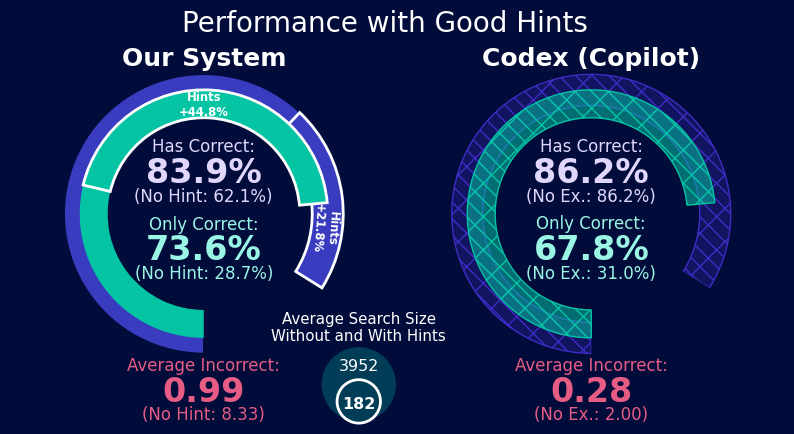

In [11]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams['axes.titley'] = .89

fig, (ax,axc) = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 1]})

center = (0,0)
title_size=18
title_y=.86

heading_size=12
number_size=24
par_size=12

radius = .9
radius_inner = .8
size = .20
size_inner = 0.18

hc_y = 0.4
hc_pad = .2

oc_y = -0.10
oc_pad = .2

incr_y = -1.01
incr_pad = .2

# ----------------------------------------------
# : Our System

# Has Correct Arc
pie = ax.pie([p4_good_avg_has_corr, good_avg_has_corr-p4_good_avg_has_corr],#, 1.0-good_avg_has_corr],
       #explode=[0,.02,0],
       normalize=False,
       radius=radius, colors=[hc_color,hc_color,bg_color], center=center,
       wedgeprops=dict(width=size,edgecolor=bg_color), startangle=-90, counterclock=False)

pie[0][1].set_edgecolor(highlt_color)
pie[0][1].set_linewidth(highlt_width)

#Only Correct Arc
angle1 = 360*p4_good_avg_only_corr
arc = mpl.patches.Wedge(center, r=radius_inner, width=size_inner, theta1=270-angle1, theta2=270,
    facecolor=oc_color)
ax.add_patch(arc)

angle2 = 360*(good_avg_only_corr-p4_good_avg_only_corr)
arc = mpl.patches.Wedge(center, r=radius_inner, width=size_inner, theta1=270-(angle1+angle2), theta2=270-(angle1),
    facecolor=oc_color, edgecolor=highlt_color, linewidth=highlt_width)
ax.add_patch(arc)

# Text
ax.set_title("Our System",size=title_size, y=title_y,weight='bold')
ax.text(0,hc_y, "Has Correct:", color=hc_t_color,
        size=heading_size, horizontalalignment='center')
ax.text(0,hc_y-hc_pad, f"{100*good_avg_has_corr:.1f}%", color=hc_t_color,
        size=number_size, horizontalalignment='center', weight='bold')
ax.text(0,hc_y-hc_pad*1.6, f"(No Hint: {100*p4_good_avg_has_corr:.1f}%)", color=hc_t_color,
        size=par_size, horizontalalignment='center')

ax.text(0, oc_y, "Only Correct:", color=oc_t_color,
        size=heading_size, horizontalalignment='center')
ax.text(0, oc_y-oc_pad, f"{100*good_avg_only_corr:.1f}%", color=oc_t_color,
        size=number_size, horizontalalignment='center', weight='bold')
ax.text(0,oc_y-oc_pad*1.6, f"(No Hint: {100*p4_good_avg_only_corr:.1f}%)", color=oc_t_color,
        size=par_size, horizontalalignment='center')


ax.text(0,incr_y, "Average Incorrect:", color=ic_t_color,
        size=heading_size, horizontalalignment='center')
ax.text(0,incr_y-incr_pad, f"{good_avg_n_incorr:.2f}", color=ic_t_color,
        size=number_size, horizontalalignment='center', weight='bold')
ax.text(0,incr_y-incr_pad*1.6, f"(No Hint: {p4_good_avg_n_incorr:.2f})", color=ic_t_color,
        size=par_size, horizontalalignment='center')



# Contribution Text
ax.text(0,.63, f"Hints\n+{100*(good_avg_only_corr-p4_good_avg_only_corr):.1f}%",
        size=par_size*.7, horizontalalignment='center', weight='bold')
ax.text(.78,-.24, f"Hints\n+{100*(good_avg_has_corr-p4_good_avg_has_corr):.1f}%",
        size=par_size*.7, horizontalalignment='center', weight='bold', rotation=-94)

# ----------------------------------------------
# : Codex

codex_avg_has_corr = "??"
codex_avg_only_corr = "??"
codex_avg_incorr = "??"
codex_no_ex_avg_incorr = "??"

pie = axc.pie([good_avg_has_corr,1.0-good_avg_has_corr],
       radius=radius, colors=["#3F2CC644","#010C3A"], center=center,
       wedgeprops=dict(width=size), startangle=-90, counterclock=False)

pie[0][0].set_edgecolor("#3F2CC6")
pie[0][0].set_hatch("\\\\/")

angle = 360*good_avg_only_corr
arc = mpl.patches.Wedge(center, r=radius_inner, width=size_inner, theta1=270-angle, theta2=270,
    facecolor="#04C4A488", edgecolor="#04C4A4", hatch="\\\\/")
axc.add_patch(arc)
axc.set_title("Codex (Copilot)",size=title_size, y=title_y, weight='bold')

axc.text(0,hc_y, "Has Correct:", color=hc_t_color,
        size=heading_size, horizontalalignment='center')
axc.text(0,hc_y-hc_pad, f"{100*cdx_good_avg_has_corr:.1f}%", color=hc_t_color,
        size=number_size, horizontalalignment='center', weight='bold')
axc.text(0,hc_y-hc_pad*1.6, f"(No Ex.: {100*cdx_noex_good_avg_has_corr:.1f}%)", color=hc_t_color,
        size=par_size, horizontalalignment='center')

axc.text(0,oc_y, "Only Correct:", color=oc_t_color,
        size=heading_size, horizontalalignment='center')
axc.text(0,oc_y-oc_pad, f"{100*cdx_good_avg_only_corr:.1f}%", color=oc_t_color,
        size=number_size, horizontalalignment='center', weight='bold')
axc.text(0,oc_y-oc_pad*1.6, f"(No Ex.: {100*cdx_noex_good_avg_only_corr:.1f}%)", color=oc_t_color,
        size=par_size, horizontalalignment='center')

axc.text(0,incr_y, "Average Incorrect:", color=ic_t_color,
        size=heading_size, horizontalalignment='center')
axc.text(0,incr_y-incr_pad, f"{cdx_good_avg_n_incorr:.2f}", color=ic_t_color,
        size=number_size, horizontalalignment='center', weight='bold')
axc.text(0,incr_y-incr_pad*1.6, f"(No Ex.: {cdx_noex_good_avg_n_incorr:.2f})", color=ic_t_color,
        size=par_size, horizontalalignment='center')


# ------------------------------------------------------
# : Search Space Size
outer_radius = .24
inner_radius = .14
ss_x = 1.0 
ss_y = -1.1
inner_offsety = -.11

c1 = mpl.patches.Circle([ss_x,ss_y], radius=outer_radius, clip_on=False,
                        facecolor=oc_color_tp)
ax.add_patch(c1)
c2 = mpl.patches.Circle([ss_x,ss_y+inner_offsety], radius=inner_radius, clip_on=False,
                        facecolor="#0000", edgecolor='white', lw=2,)
ax.add_patch(c2)

ax.text(ss_x,ss_y+.28, "Average Search Size\nWithout and With Hints",
        size=heading_size*.9, horizontalalignment='center')
ax.text(ss_x,ss_y+.09, f"{p4_good_avg_n_infs:.0f}",
        size=number_size*.48, horizontalalignment='center')
ax.text(ss_x,ss_y-.16, f"{good_avg_n_infs:.0f}",
        size=number_size*.48, horizontalalignment='center', weight='bold')


#ax.text(.5,incr_y-.2, f"*excludes P8", color=ic_t_color,
#        size=number_size*.3, horizontalalignment='center')


fig.suptitle("Performance with Good Hints", size=20, y=.75)
fig.subplots_adjust(wspace=0)
plt.show()


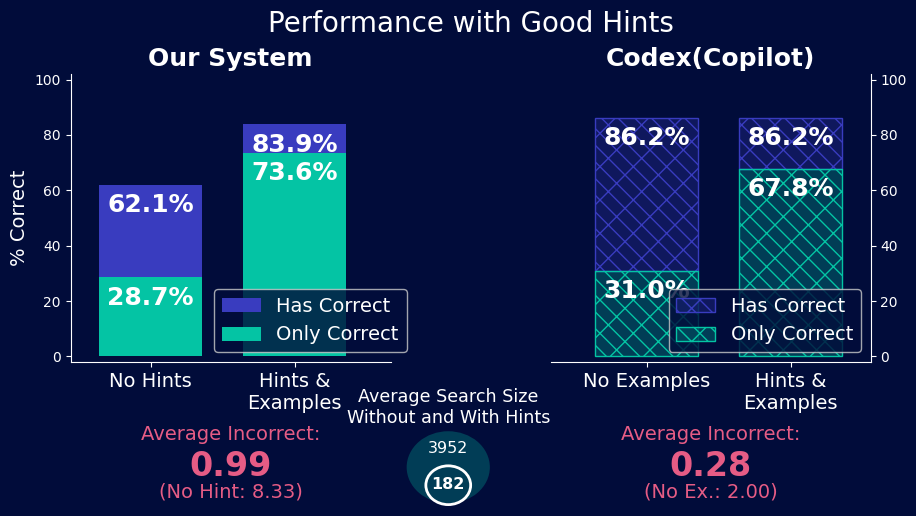

In [12]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams['axes.titley'] = .89


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)
 
ax = plt.subplot2grid(shape=(5, 5), loc=(0, 0),colspan=2, rowspan=2)
axc = plt.subplot2grid(shape=(5, 5), loc=(0, 3),colspan=2, rowspan=2)
axb = plt.subplot2grid(shape=(5, 1), loc=(2, 0),colspan=2)

# Invisible axb
axb.axis('off')

#fig, (ax,axc) = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 1]})

center = (0,0)
title_size=18
title_y=1.0

heading_size=14
number_size=24
par_size=14

hc_x = 0
hc_y = 80
hc_pad = 13

oc_x = 0
oc_y = 50
oc_pad = 13

incr_x = 50
incr_y = -30
incr_pad = 13
width = 32

TextKind = "On Graph"


# ----------------------------------------------
# : Our System

hc_x = oc_x = 95
ticks = [25,70]

oc = 100*good_avg_only_corr
p4_oc = 100*p4_good_avg_only_corr

hc = 100*good_avg_has_corr
p4_hc = 100*p4_good_avg_has_corr

diff = 100*(good_avg_has_corr-good_avg_only_corr)
p4_diff = 100*(p4_good_avg_has_corr-p4_good_avg_only_corr)

ax.set_title("Our System",size=title_size, y=title_y,weight='bold')

bar = ax.bar(ticks, [p4_diff, diff], width, label='Has Correct',
             color=hc_color, bottom = [p4_oc, oc])

bar = ax.bar(ticks, [p4_oc, oc], width, label='Only Correct',
             color=oc_color)
             
            
ax.set_facecolor(bg_color)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks(ticks, ['No Hints', "Hints &\nExamples"])
ax.set_xlim(0,100)

if(TextKind == "On Graph"):
    ax.text(ticks[1],hc-10, f"{hc:.1f}%", color='white',
        size=number_size*.75, horizontalalignment='center', weight='bold')
    ax.text(ticks[1],oc-10, f"{oc:.1f}%", color='white',
        size=number_size*.75, horizontalalignment='center', weight='bold')
    
    ax.text(ticks[0],p4_hc-10, f"{p4_hc:.1f}%", color='white',
        size=number_size*.75, horizontalalignment='center', weight='bold')
    ax.text(ticks[0],p4_oc-10, f"{p4_oc:.1f}%", color='white',
        size=number_size*.75, horizontalalignment='center', weight='bold')
else:
    ax.text(hc_x,hc_y, "Has Correct:", color=hc_t_color,
            size=heading_size, horizontalalignment='center')
    ax.text(hc_x,hc_y-hc_pad, f"{100*good_avg_has_corr:.1f}%", color=hc_t_color,
            size=number_size, horizontalalignment='center', weight='bold')
    #ax.text(hc_x,hc_y-hc_pad*1.6, f"(No Hint: {100*p4_good_avg_has_corr:.1f}%)", color=hc_t_color,
    #        size=par_size, horizontalalignment='center')

    ax.text(oc_x, oc_y, "Only Correct:", color=oc_t_color,
            size=heading_size, horizontalalignment='center')
    ax.text(oc_x, oc_y-oc_pad, f"{100*good_avg_only_corr:.1f}%", color=oc_t_color,
            size=number_size, horizontalalignment='center', weight='bold')
    #ax.text(oc_x,oc_y-oc_pad*1.6, f"(No Hint: {100*p4_good_avg_only_corr:.1f}%)", color=oc_t_color,
    #        size=par_size, horizontalalignment='center')


ax.text(incr_x,incr_y, "Average Incorrect:", color=ic_t_color,
        size=heading_size, horizontalalignment='center')
ax.text(incr_x,incr_y-incr_pad, f"{good_avg_n_incorr:.2f}", color=ic_t_color,
        size=number_size, horizontalalignment='center', weight='bold')
ax.text(incr_x,incr_y-incr_pad*1.6, f"(No Hint: {p4_good_avg_n_incorr:.2f})", color=ic_t_color,
        size=par_size, horizontalalignment='center')


# ----------------------------------------------
# : Codex

hc_x = oc_x = -2
ticks = [30,75]

cdx_oc = 100*cdx_good_avg_only_corr
cdx_noex_oc = 100*cdx_noex_good_avg_only_corr

cdx_hc = 100*cdx_good_avg_has_corr
cdx_noex_hc = 100*cdx_noex_good_avg_has_corr

cdx_diff = 100*(cdx_good_avg_has_corr-cdx_good_avg_only_corr)
cdx_noex_diff = 100*(cdx_noex_good_avg_has_corr-cdx_noex_good_avg_only_corr)

axc.set_title("Codex(Copilot)",size=title_size, y=title_y,weight='bold')

bar = axc.bar(ticks, [cdx_noex_diff, cdx_diff], width, label='Has Correct',
             bottom = [cdx_noex_oc, cdx_oc],
             color=hc_color_tp, edgecolor=hc_color, hatch='\\\\/')

bar = axc.bar(ticks, [cdx_noex_oc, cdx_oc], width, label='Only Correct',
             color=oc_color_tp, edgecolor=oc_color, hatch='\\\\/')
             


            
axc.set_facecolor(bg_color)
axc.spines[['left', 'top']].set_visible(False)
axc.set_xticks(ticks, ['No Examples',"Hints &\nExamples", ])
axc.set_xlim(0,100)

axc.yaxis.set_label_position("right")
axc.yaxis.tick_right()

# : Y-axes
fig.align_ylabels()
ax.set_ylabel('% Correct', fontsize=14)
ax.set_ylim(-2,102)
axc.set_ylim(-2,102)
ax.legend(loc='lower right', fontsize=14, bbox_to_anchor=(1.08, 0))
axc.legend(loc='lower right', fontsize=14)


if(TextKind == "On Graph"):
    axc.text(ticks[1],cdx_hc-10, f"{cdx_hc:.1f}%", color='white',
        size=number_size*.75, horizontalalignment='center', weight='bold')
    axc.text(ticks[1],cdx_oc-10, f"{cdx_oc:.1f}%", color='white',
        size=number_size*.75, horizontalalignment='center', weight='bold')
    
    axc.text(ticks[0],cdx_noex_hc-10, f"{cdx_noex_hc:.1f}%", color='white',
        size=number_size*.75, horizontalalignment='center', weight='bold')
    axc.text(ticks[0],cdx_noex_oc-10, f"{cdx_noex_oc:.1f}%", color='white',
        size=number_size*.75, horizontalalignment='center', weight='bold')
    
else:
    axc.text(hc_x,hc_y, "Has Correct:", color=hc_t_color, label='Has Correct',
            size=heading_size, horizontalalignment='center')
    axc.text(hc_x,hc_y-hc_pad, f"{100*cdx_good_avg_has_corr:.1f}%", color=hc_t_color,
            size=number_size, horizontalalignment='center', weight='bold')
    #axc.text(0,hc_y-hc_pad*1.6, f"(No Ex.: {100*cdx_noex_good_avg_has_corr:.1f}%)", color=hc_t_color,
    #        size=par_size, horizontalalignment='center')

    axc.text(oc_x,oc_y, "Only Correct:", color=oc_t_color, label='Only Correct',
            size=heading_size, horizontalalignment='center')
    axc.text(oc_x,oc_y-oc_pad, f"{100*cdx_good_avg_only_corr:.1f}%", color=oc_t_color,
            size=number_size, horizontalalignment='center', weight='bold')
    #axc.text(0,oc_y-oc_pad*1.6, f"(No Ex.: {100*cdx_noex_good_avg_only_corr:.1f}%)", color=oc_t_color,
    #        size=par_size, horizontalalignment='center')

axc.text(incr_x,incr_y, "Average Incorrect:", color=ic_t_color,
        size=heading_size, horizontalalignment='center')
axc.text(incr_x,incr_y-incr_pad, f"{cdx_good_avg_n_incorr:.2f}", color=ic_t_color,
        size=number_size, horizontalalignment='center', weight='bold')
axc.text(incr_x,incr_y-incr_pad*1.6, f"(No Ex.: {cdx_noex_good_avg_n_incorr:.2f})", color=ic_t_color,
        size=par_size, horizontalalignment='center')


# Line
#line = mpl.patches.Rectangle([ticks[0]-width/2,0],width=0, height=100*cdx_good_avg_has_corr,
#                        lw=2, edgecolor='white', zorder=1)
#axc.add_patch(line)


# ------------------------------------------------------
# : Search Space Size
outer_radius = 13
inner_radius = 7
ss_x = 118
ss_y = -40
inner_offsety = -6.5

c1 = mpl.patches.Circle([ss_x,ss_y], radius=outer_radius, clip_on=False,
                        facecolor=oc_color_tp, zorder=1)
ax.add_patch(c1)
c2 = mpl.patches.Circle([ss_x,ss_y+inner_offsety], radius=inner_radius, clip_on=False,
                        facecolor="#0000", edgecolor='white', lw=2,)
ax.add_patch(c2)

ax.text(ss_x,ss_y+16, "Average Search Size\nWithout and With Hints",
        size=heading_size*.9, horizontalalignment='center')
ax.text(ss_x,ss_y+5, f"{p4_good_avg_n_infs:.0f}",
        size=number_size*.48, horizontalalignment='center')
ax.text(ss_x,ss_y-8, f"{good_avg_n_infs:.0f}",
        size=number_size*.48, horizontalalignment='center', weight='bold')


#ax.text(.5,incr_y-.2, f"*excludes P8", color=ic_t_color,
#        size=number_size*.3, horizontalalignment='center')


ax.tick_params(axis='x', which='major', labelsize=14)
axc.tick_params(axis='x', which='major', labelsize=14)

fig.suptitle("Performance with Good Hints", size=20)
plt.subplots_adjust(bottom=0.0, left=.1, right=0.9, top=0.9)
fig.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout(pad=.5)
plt.show()


In [13]:
print("Average Has Correct", np.nanmean(has_corr_arr))
print("Average Num Incorrect", np.nanmean(n_incorrect_arr))
print("Average Only Correct", np.nanmean(only_corr_arr)) 
print("Average Num Inferences", np.nanmean(n_infs_arr))
print()
print("Good Average Has Correct", np.nanmean(good_has_corr_arr))
print("Good Average Num Incorrect", np.nanmean(good_n_incorrect_arr))
print("Good Average Only Correct", np.nanmean(good_only_corr_arr))
print("Good Average Num Inferences", np.nanmean(good_n_infs_arr))
def safe_nanmean(a):
    out = np.zeros(a.shape[1],dtype=np.float64)
    for i in range(a.shape[1]):
        try:
            out[i] = np.nanmean(a[:,i])
        except:
            out[i] = 0
        if(np.isnan(out[i])): out[i] = 0
    print(out)
    return out

has_corr_arr_bp = safe_nanmean(has_corr_arr)
n_incorrect_arr_bp = safe_nanmean(n_incorrect_arr)
only_corr_arr_bp = safe_nanmean(only_corr_arr)
n_infs_arr_bp = safe_nanmean(n_infs_arr)

good_has_corr_arr_bp = safe_nanmean(good_has_corr_arr)
good_n_incorrect_arr_bp = safe_nanmean(good_n_incorrect_arr)
good_only_corr_arr_bp = safe_nanmean(good_only_corr_arr)
good_n_infs_arr_bp = safe_nanmean(good_n_infs_arr)




cdx_good_has_corr_arr_bp = safe_nanmean(cdx_good_has_corr_arr)
cdx_good_n_incorr_arr_bp = safe_nanmean(cdx_good_n_incorr_arr)
cdx_good_only_corr_arr_bp = safe_nanmean(cdx_good_only_corr_arr)




Average Has Correct 0.80701756
Average Num Incorrect 1.8859649122807018
Average Only Correct 0.69298244
Average Num Inferences 932.4473684210526

Good Average Has Correct 0.83908045
Good Average Num Incorrect 0.9885057471264368
Good Average Only Correct 0.7356322
Good Average Num Inferences 182.16091954022988
[0.8888889  1.         1.         1.         1.         0.875      1.         0.14285715 1.         0.89999998 0.71428573 1.         0.40000001 0.5       ]
[ 0.11111111  0.         12.2         0.          0.          0.25        0.          6.          2.          0.6         0.57142857  0.88888889  7.1         1.        ]
[0.8888889  1.         0.80000001 1.         1.         0.875      1.         0.14285715 0.40000001 0.60000002 0.5714286  0.77777779 0.30000001 0.30000001]
[ 289.66666667    9.75       2728.           12.25         52.75         40.5          32.9        9276.14285714 3158.8         308.3         133.85714286  148.          150.5         121.7       ]
[0.833333

[ 83.33333135 100.         100.         100.         100.          87.5        100.          20.0000003  100.          83.33333135  50.         100.          50.          71.42857313]
[ 83.33333135 100.         100.         100.         100.          87.5        100.          20.0000003   66.66666865  50.          25.          77.7777791   33.33333433  42.85714328]
[0.16666667 0.         0.         0.         0.         0.25       0.         1.2        0.33333333 0.83333333 1.         0.88888889 8.83333333 0.85714286]


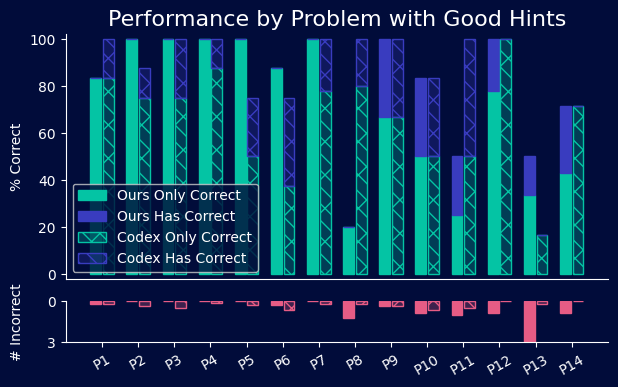

In [14]:
labels = [f'P{i+1}' for i in range(14)]

plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams['axes.titley'] = 1.0

fig, (ax,axb) = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [6, 1]})

width = 0.3       # the width of the bars: can also be len(x) sequence
space = .05

hc = 100*good_has_corr_arr_bp
oc = 100*good_only_corr_arr_bp

cdx_hc = 100*cdx_good_has_corr_arr_bp
cdx_oc = 100*cdx_good_only_corr_arr_bp

diff = hc - oc
cdx_diff = cdx_hc - cdx_oc
inds = np.arange(len(diff))

print(hc)
print(oc)
print(good_n_incorrect_arr_bp)

# : Plot Content
ax.bar(inds, oc, width,
       label='Ours Only Correct', color=oc_color, edgecolor=oc_color)
ax.bar(inds, diff, width, bottom=oc,
       label='Ours Has Correct', color=hc_color, edgecolor=hc_color)

ax.bar(inds+width+space, cdx_oc, width,
       label='Codex Only Correct', color=oc_color_tp, edgecolor=oc_color, hatch='\\\\/')
ax.bar(inds+width+space, cdx_diff, width, bottom=cdx_oc,
       label='Codex Has Correct', color=hc_color_tp, edgecolor=hc_color,hatch='\\\\/')


axb.bar(inds, good_n_incorrect_arr_bp, width,
       label='Ours # Incorrect', color=ic_color, edgecolor=ic_color)
axb.bar(inds+width+space, cdx_good_n_incorr_arr_bp, width,
       label='Codex # Incorrect', color=ic_color_tp, edgecolor=ic_color,hatch='\\\\/')

#axb2.bar(inds, good_n_incorrect_arr_bp, width,
#       label='Ours # Incorrect', color=ic_color, edgecolor="#e65c85")
#axb2.bar(inds+width+space, good_n_incorrect_arr_bp, width,
#       label='Codex # Incorrect', color=ic_color_tp, edgecolor="#e65c85",hatch='\\\\/')

fig.subplots_adjust(hspace=.16)
ax.set_title('Performance by Problem with Good Hints', size=16)

# : X-axes
ax.set_facecolor(bg_color)
ax.spines[['right', 'top']].set_visible(False)
ax.get_xaxis().set_visible(False)

axb.set_facecolor(bg_color)
axb.spines[['right', 'top']].set_visible(False)

# : Y-axes
fig.align_ylabels()
ax.set_ylabel('% Correct')
ax.set_ylim(-2,102)
ax.legend(loc='lower left')

axb.set_ylabel('# Incorrect')
axb.set_ylim(0,3)
axb.set_yticks([0,3])
axb.invert_yaxis()


plt.xticks(inds + width / 2  + space/2, labels, rotation=30)


plt.show()

## Random Formulae

In [15]:
import numpy as np
rand_args = np.unique(np.random.randint(14,size=20))[:10]
np.random.shuffle(rand_args)
rand_args = list(rand_args)
# Don'y use Sin or Cos 
b = [x for x in set(func_dictionary.values()) if (s:=str(x)) and not ("cos" in s or "sin" in s)]
#print(b)

policy = [[],[],[]]
for i in range(np.random.randint(4,6)):
    op = b[np.random.randint(len(b))]
    depth = np.random.randint(3)
    
    args = []
    if(depth == 0):
        args = [rand_args.pop() for _ in range(op.n_args)]
    elif(op.n_args > 1):
        args = [rand_args.pop()]    
    
    policy[depth].append((op,args))
    
print("A random policy to make up a random formuale from:")
for i,dp in enumerate(policy):
    print(f"{i} : {dp}")



A random policy to make up a random formuale from:
0 : []
1 : []
2 : [(Log2(a), []), (Double(a), []), (Half(a), []), (Power(a, b), [7])]


In [16]:
# 1: ((3-8) / Double(2)) + 1)
p = do_search([3,8,2], -0.25, 
 "Divide 3 minus 8 and twice 2, then increment.")
p.add_corr_strs([
    '(Increment(Divide(Subtract(a, b), Double(c))), [3.0, 8.0, 2.0])'
])
print(p)

# 2: 7^(half(12) / 3)
p = do_search([12,3,7], 49.0, 
 "To get the exponent take half of 12 divided by 3. Then find 7 to the power of the exponent.")
p.add_corr_strs([
    '(Power(a, Half(Divide(b, c))), [7.0, 12.0, 3.0])',
    '(Power(a, Divide(Half(b), c))), [7.0, 12.0, 3.0])'
])
print(p)

# 3: Square((4**2)-6)
p = do_search([4,6], 100, 
 "Take the square of 4, then subtract 6 from it. Finally square the result")
p.add_corr_strs(["(Square(Subtract(Square(a), b)), [4.0, 6.0])"])
print(p)

# 4:  Ones(Double(11))+1)
p = do_search([11], 3, 
 "Take the one's digit of twice 11. Then increment it.")
p.add_corr_strs(["(Increment(Ones(Double(a))), [11.0])"])
print(p)

/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


1.5 ((a - b) / (c*2))+1 [3.0, 8.0, 2.0]


/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 19
2 (a - a) - (a / b) [2.0, 8.0] -0.25
2 (a - a) - (b / a) [8.0, 2.0] -0.25
2 (a - a) - (b / c) [3.0, 2.0, 8.0] -0.25
2 Tens(a) - (a / b) [2.0, 8.0] -0.25
2 Tens(a) - (b / a) [8.0, 2.0] -0.25
2 Tens(a) - (b / c) [3.0, 2.0, 8.0] -0.25
2 (a - b) / (b * c) [2.0, 8.0, 3.0] -0.25
2 (a - b) / (a + a) [2.0, 3.0] -0.25
2 (a - b) / (a^a) [2.0, 3.0] -0.25
2 (a - b) / (c/2) [2.0, 3.0, 8.0] -0.25
2 (a - b) / (c / a) [2.0, 3.0, 8.0] -0.25
2 (a - b) / (a * a) [2.0, 3.0] -0.25
2 (a - b) / (b+1) [2.0, 3.0] -0.25
2 (a - b) / (a^2) [2.0, 3.0] -0.25
2 (a - b) / (a*2) [2.0, 3.0] -0.25
2 (a / b) / (a - c) [2.0, 8.0, 3.0] -0.25
2 (a/2) / (b - c) [3.0, 2.0, 8.0] -0.25
2 (a / b) / (b - c) [3.0, 2.0, 8.0] -0.25
2 (a - b) * (a / c) [2.0, 3.0, 8.0] -0.25
-- Goal -0.25 : "Divide 3 minus 8 and twice 2, then increment."
✔ (1/1) :

In [17]:
# 5: (5*2)**2+6
p = do_search([5,2,6], 106, 
 "Find 5 times 2. Then square it and add 6 to it.")
p.add_corr_strs(["(Add(Square(Multiply(a, b)), c), [5.0, 2.0, 6.0])"])
print(p)

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 199
3 ((a^b) - b) - ((a - b) * (b + b)) [2.0, 6.0] 106.0
3 ((a^b) - b) - ((a - b) * (b * a)) [2.0, 6.0] 106.0
3 ((a^b) - b) - ((a - b) * (b*2)) [2.0, 6.0] 106.0
3 ((a + b) + (a^2)) - (b - (c^a)) [6.0, 5.0, 2.0] 106.0
3 ((a - b) - (c + c)) - ((a - b) * (b * c)) [2.0, 6.0, 5.0] 106.0
3 ((a - b) - (a * c)) - ((a - b) * (b * c)) [2.0, 6.0, 5.0] 106.0
3 ((a - b) - (c*2)) - ((a - b) * (b * c)) [2.0, 6.0, 5.0] 106.0
3 ((a - b) - (c + b)) - ((a - c) * (c * b)) [2.0, 5.0, 6.0] 106.0
3 ((a + b) - (b^c)) - ((c - a) * (a * b)) [6.0, 5.0, 2.0] 106.0
3 ((a + b) - (b * b)) - ((c - a) * (a * b)) [6.0, 5.0, 2.0] 106.0
3 ((a + b) - (b^2)) - ((c - a) * (a * b)) [6.0, 5.0, 2.0] 106.0
3 ((a^b) - (b + c)) - ((b + c) - (a^b)) [2.0, 6.0, 5.0] 106.0
3 ((a^b) - (b + b)) - ((c + c) - (a^b)) [2.0, 6.0, 5.0] 106.0
3 ((a^b) - (b *

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 199
3 ((a^b) - b) - ((a - b) * (b + b)) [2.0, 6.0] 106.0
3 ((a^b) - b) - ((a - b) * (b * a)) [2.0, 6.0] 106.0
3 ((a^b) - b) - ((a - b) * (b*2)) [2.0, 6.0] 106.0
3 ((a + b) + (a^2)) - (b - (c^a)) [6.0, 5.0, 2.0] 106.0
3 ((a - b) - (c + c)) - ((a - b) * (b * c)) [2.0, 6.0, 5.0] 106.0
3 ((a - b) - (a * c)) - ((a - b) * (b * c)) [2.0, 6.0, 5.0] 106.0
3 ((a - b) - (c*2)) - ((a - b) * (b * c)) [2.0, 6.0, 5.0] 106.0
3 ((a - b) - (c + b)) - ((a - c) * (c * b)) [2.0, 5.0, 6.0] 106.0
3 ((a + b) - (b^c)) - ((c - a) * (a * b)) [6.0, 5.0, 2.0] 106.0
3 ((a + b) - (b * b)) - ((c - a) * (a * b)) [6.0, 5.0, 2.0] 106.0
3 ((a + b) - (b^2)) - ((c - a) * (a * b)) [6.0, 5.0, 2.0] 106.0
3 ((a^b) - (b + c)) - ((b + c) - (a^b)) [2.0, 6.0, 5.0] 106.0
3 ((a^b) - (b + b)) - ((c + c) - (a^b)) [2.0, 6.0, 5.0] 106.0
3 ((a^b) - (b *

In [18]:
# 6:  (double(8) + half(6))**2. 
p = do_search([8,6], 361, 
 "Add double of 8 and half of 6. Then square the result.")
p.add_corr_strs(["(Square(Add(Half(a), Double(b))), [6.0, 8.0])"])
print(p)

for expl in p.unq_expls:
    print(expl)


1.5 ((a/2) + (b*2))^2 [6.0, 8.0]


/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 199
3 ((a * b) * b) - ((a + b) + (b+1)) [6.0, 8.0] 361.0
3 ((a * a) * b) - ((b + a) + (a+1)) [8.0, 6.0] 361.0
3 ((a^2) * b) - ((b + a) + (a+1)) [8.0, 6.0] 361.0
3 ((a * b) * b) - ((b-1) + (b + b)) [6.0, 8.0] 361.0
3 ((a * a) * b) - ((a-1) + (a + a)) [8.0, 6.0] 361.0
3 ((a^2) * b) - ((a-1) + (a + a)) [8.0, 6.0] 361.0
3 ((a * b) * b) - ((b-1) + (b + b)) [6.0, 8.0] 361.0
3 ((a * a) * b) - ((a-1) + (a + a)) [8.0, 6.0] 361.0
3 ((a^2) * b) - ((b+1) + (a + a)) [8.0, 6.0] 361.0
3 ((a * b) * b) - ((a+1) + (b + b)) [6.0, 8.0] 361.0
3 ((a * a) * b) - ((b+1) + (a + a)) [8.0, 6.0] 361.0
3 ((a^2) * b) - ((a-1) + (a*2)) [8.0, 6.0] 361.0
3 ((a * b) * b) - ((b-1) + (b*2)) [6.0, 8.0] 361.0
3 ((a * a) * b) - ((a-1) + (a*2)) [8.0, 6.0] 361.0
3 ((a^2) * b) - ((b+1) + (a*2)) [8.0, 6.0] 361.0
3 ((a+1) + (a^2)) + ((b * a) * 

In [19]:
# 7: (9*3)/6-2
p = do_search([9,3,6,2], 2.5, 
 "Divide 9 times 3 by 6, then subtract 2.")
p.add_corr_strs(["(Subtract(Divide(Multiply(a, b), c), d), [9.0, 3.0, 6.0, 2.0])"])
print(p)

for expl in p.unq_expls:
    print(expl)

2.0 ((a * b) / c) - d [9.0, 3.0, 6.0, 2.0]
1.6666666666666667 ((a * b) / c) - (c / b) [9.0, 3.0, 6.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 100
2 (a/2) - b [9.0, 2.0] 2.5
2 (a / b) - b [9.0, 2.0] 2.5
2 a - (a / b) [3.0, 6.0] 2.5
2 (a / b) + c [3.0, 6.0, 2.0] 2.5
2 (a-1/2) [6.0] 2.5
2 (a + b/2) [2.0, 3.0] 2.5
2 (a-1) / b [6.0, 2.0] 2.5
2 (a + b) / a [2.0, 3.0] 2.5
2 (a + b) / a [6.0, 9.0] 2.5
2 (a/2)+1 [3.0] 2.5
2 (a / b)+1 [3.0, 2.0] 2.5
2 (a / b)+1 [9.0, 6.0] 2.5
2 (a/2) - (b-1) [9.0, 3.0] 2.5
2 (a / b) - (c-1) [9.0, 2.0, 3.0] 2.5
2 (a/2) - (b / c) [9.0, 6.0, 3.0] 2.5
2 (a / b) - (c / d) [9.0, 2.0, 6.0, 3.0] 2.5
2 (a/2) - Ones(b) [9.0, 2.0] 2.5
2 (a / b) - Ones(b) [9.0, 2.0] 2.5
2 (a/2) - (b - a) [3.0, 2.0] 2.5
2 (a / b) - (b - a) [3.0, 2.0] 2.5
2 (a / b) - (c - d) [9.0, 6.0, 2.0, 3.0] 2.5
2 (a - b) - (a/2) [9.0, 2.0] 2.5
2 (a+1) - (b/2)

In [20]:
# 8: Double(13)+(5*7)
p = do_search([13,5,7], 61, 
 "Double 13 and add it to 5 times 7.")
p.add_corr_strs(["(Add(Double(a), Multiply(b, c)), [13.0, 5.0, 7.0])"])
print(p)

for expl in p.unq_expls:
    print(expl)

1.6666666666666667 (a*2) + (b * c) [13.0, 5.0, 7.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 7
2 (a * b) - (a-1) [5.0, 13.0] 61.0
2 (a-1) + (b * b) [13.0, 7.0] 61.0
2 (a + b) + (a * a) [7.0, 5.0] 61.0
2 (a-1) + (b^2) [13.0, 7.0] 61.0
2 (a + b) + (a^2) [7.0, 5.0] 61.0
2 (a * b) + (c + c) [7.0, 5.0, 13.0] 61.0
2 (a * b) + (c*2) [7.0, 5.0, 13.0] 61.0
-- Goal 61 : "Double 13 and add it to 5 times 7."
✔ (1/1) :  1, 1 unique solutions at phase 1. *
(Add(Double(a), Multiply(b, c)), [13.0, 5.0, 7.0])


In [21]:
# 9: ((11-12)+(4**2))-6
p = do_search([11,9,4,6], 12, 
 "Add 11 minus 9 and 4 squared. Then subtract 6")
p.add_corr_strs(["(Subtract(Add(Subtract(a, b), Square(c)), d), [11.0, 9.0, 4.0, 6.0])",
                 "(Subtract(Add(Square(a), Subtract(b, c)), d), [4.0, 11.0, 9.0, 6.0])"])
print(p)

for expl in p.unq_expls:
    print(expl)

1.75 ((a - b) + (c^2)) - d [11.0, 9.0, 4.0, 6.0]
1.5 (a^2) - ((b - c) + d) [4.0, 9.0, 11.0, 6.0]
{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 3
1 a + a [6.0] 12.0
1 a+1 [11.0] 12.0
1 (a*2) [6.0] 12.0
-- Goal 12 : "Add 11 minus 9 and 4 squared. Then subtract 6"
✔ (1/1) :  1, 1 unique solutions at phase 1. *
(Subtract(Add(Subtract(a, b), Square(c)), d), [11.0, 9.0, 4.0, 6.0])


In [22]:
# 10: (Decrement(3)*6)+1
p = do_search([3,6,1], 13, 
 "Decrement 3, then multiply it by 6, and add 1.")
p.add_corr_strs(["(Add(Multiply(Decrement(a), b), c), [3.0, 6.0, 1.0])"])
print(p)

for expl in p.unq_expls:
    print(expl)

/home/danny/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 45
2 (a + b) + b [1.0, 6.0] 13.0
2 (a+1) + a [6.0] 13.0
2 (a + a) + b [6.0, 1.0] 13.0
2 (a*2) + b [6.0, 1.0] 13.0
2 (a + a)+1 [6.0] 13.0
2 (a*2)+1 [6.0] 13.0
2 (a * b) - (a - c) [6.0, 3.0, 1.0] 13.0
2 (a * b) - (a-1) [6.0, 3.0] 13.0
2 (a - b) + (b * c) [1.0, 6.0, 3.0] 13.0
2 (a + b) + (c + c) [1.0, 6.0, 3.0] 13.0
2 (a+1) + (b + b) [6.0, 3.0] 13.0
2 (a + b) + (b^a) [1.0, 6.0] 13.0
2 (a+1) + (a^b) [6.0, 1.0] 13.0
2 (a + b) + (b / a) [1.0, 6.0] 13.0
2 (a+1) + (a / b) [6.0, 1.0] 13.0
2 (a + b) + (a * b) [1.0, 6.0] 13.0
2 (a+1) + (b * a) [6.0, 1.0] 13.0
2 (a + b) + Ones(b) [1.0, 6.0] 13.0
2 (a+1) + Ones(a) [6.0] 13.0
2 (a + b) + (c*2) [1.0, 6.0, 3.0] 13.0
2 (a+1) + (b*2) [6.0, 3.0] 13.0
2 (a + b) + (c + b) [1.0, 3.0, 6.0] 13.0
2 (a+1) + (b + a) [3.0, 6.0] 13.0
2 (a + b) + (b * b) [1.0, 3.0] 13.0
2 (a+1) + 

In [23]:
# 3: Square((4**2)-6)
p = do_search([4,6], 100, 
 "Take the square of 4, then subtract 6 from it. Finally square the result")
p.add_corr_strs(["(Square(Subtract(Square(a), b)), [4.0, 6.0])"])
print(p)

for expl in p.unq_expls:
    print(expl)

{Double(a), Sin(a), Square(a), Increment(a), Ones(a), Log2(a), Multiply(a, b), Cos(a), Divide(a, b), Half(a), Tens(a), Power(a, b), Add(a, b), Decrement(a), Subtract(a, b)}
-- P5 EXPLS -- 5
2 (a + b)^2 [6.0, 4.0] 100.0
2 (a + b)^(a - b) [6.0, 4.0] 100.0
2 (a + b)^(b/2) [6.0, 4.0] 100.0
2 (a + b)^log2(b) [6.0, 4.0] 100.0
2 (a + b) * (a + b) [6.0, 4.0] 100.0
-- Goal 100 : "Take the square of 4, then subtract 6 from it. Finally square the result"
✔ (1/2) :  2, 2 unique solutions at phase 3. *
(Square(Subtract(a, Square(b))), [6.0, 4.0])
(Square(Subtract(Square(a), b)), [4.0, 6.0])


## Codex on Made-up Formuale

In [24]:
### DEAD CODE
#axb.get_xaxis().set_visible(False)

#axb2.set_facecolor(bg_color)
#axb2.spines[['right', 'top']].set_visible(False)

#axb2.set_ylim(20,80)
#axb2.set_yticks([20,80])
#axb2.legend(loc='lower left')
#axb2.invert_yaxis()

# : Break Squiggles
def add_squiggle_patch(ax, x, y, w, a,**kwargs):
    Path = mpl.path.Path
    patch = mpl.patches.PathPatch(
        Path([(x-w/2, y), (x-w/4, y+a), (x, y), (x+w/4, y-a), (x+w/2, y)],
             [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
        fc="none", transform=ax.transData, clip_on=False, **kwargs)

    ax.add_patch(patch)

#add_squiggle_patch(axb, 7  , 6, width*1.4, .5, lw=1.3, edgecolor='white')
#add_squiggle_patch(axb, -.9  , 6, width, .5, lw=1.3, edgecolor='white')
#add_squiggle_patch(axb2, 7  , 20, width*1.4, 4, lw=1.3, edgecolor='white')
#add_squiggle_patch(axb2, -.9  , 20, width, 4, lw=1.3, edgecolor='white')
